# Exploración y Visualización

### Fase 3 y 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")

In [3]:
df_consolidado = pd.read_csv("../datos/consolidado.csv", index_col=0, parse_dates=["fecha_lanzamiento"])
df_consolidado.head(1)

,codigo_organo_superior,nombre_organo_superior,codigo_organo,nombre_organo,codigo_unidad_gestora,nombre_unidad_gestora,categoria_economica,origen_ingreso,tipo_ingreso,valor_previsto_actualizado,valor_lanzado,valor_realizado,porcentaje_realizado,fecha_lanzamiento,anio_ejercicio
0.0,63000.0,Sem informação,63000.0,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,Bens. Direitos e Valores Incorporados ao Patr,0.0,0.0,1297.13,0.0,2013-12-31,2013.0


In [4]:
df_consolidado[df_consolidado["valor_previsto_actualizado"].isna()]["valor_previsto_actualizado"]

NaN   NaN
Name: valor_previsto_actualizado, dtype: float64

In [5]:
condicion = df_consolidado["codigo_organo_superior"] == -1.0
condicion2 = df_consolidado["nombre_organo_superior"] == "Sem informação"
condicion3 = df_consolidado["codigo_organo"] == -1.0
condicion4 = df_consolidado["nombre_organo"] == "Sem informação"
df_consolidado[condicion & condicion2 & condicion3 & condicion4].reset_index()

,index,codigo_organo_superior,nombre_organo_superior,codigo_organo,nombre_organo,codigo_unidad_gestora,nombre_unidad_gestora,categoria_economica,origen_ingreso,tipo_ingreso,valor_previsto_actualizado,valor_lanzado,valor_realizado,porcentaje_realizado,fecha_lanzamiento,anio_ejercicio
0,22489.0,-1.0,Sem informação,-1.0,Sem informação,121002.0,SECRETARIA DE ECON. E FIN.DA AER.- F.AER.,Receitas Correntes,Receita Patrimonial,Exploração do patrimônio imobiliário do Estad,0.0,0.0,5.478000e+01,0.0,2017-12-15,2017.0
1,39625.0,-1.0,Sem informação,-1.0,Sem informação,170013.0,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,Receitas Correntes - intra-orçamentárias,Impostos. Taxas e Contribuições de Melhoria,Taxas,0.0,0.0,2.640000e+02,0.0,2018-06-15,2018.0
2,58590.0,-1.0,Sem informação,-1.0,Sem informação,380910.0,COORD-GERAL DE ORCAMENTO. FIN. E CONT.- CGOFC,Receitas Correntes,Outras Receitas Correntes,Indenizações. restituições e ressarcimentos,0.0,0.0,1.666090e+05,0.0,2018-08-16,2018.0
3,134788.0,-1.0,Sem informação,-1.0,Sem informação,-1.0,AGENCIA NACIONAL DE TRANSPORTES TERRESTRES,Receitas Correntes,Outras Receitas Correntes,Multas administrativas. contratuais e judicia,0.0,0.0,5.078591e+04,0.0,2018-04-19,2018.0
4,94173.0,-1.0,Sem informação,-1.0,Sem informação,158141.0,INST.FED.DE EDUC..CIENC.E TEC.DO RS,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,0.0,0.0,9.400000e+02,0.0,2019-06-12,2019.0
5,25164.0,-1.0,Sem informação,-1.0,Sem informação,121002.0,SECRETARIA DE ECON. E FIN.DA AER.- F.AER.,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,0.0,0.0,8.356920e+04,0.0,2020-07-09,2020.0
6,38715.0,-1.0,Sem informação,-1.0,Sem informação,170013.0,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,Receitas de Capital,Operações de Crédito,Operações de crédito - mercado interno,0.0,0.0,1.841229e+10,0.0,NaT,2020.0
7,76089.0,-1.0,Sem informação,-1.0,Sem informação,158146.0,INST.FED.DE EDUC..CIENC.E TEC.DO PIAUI,Receitas Correntes,Outras Receitas Correntes,Indenizações. restituições e ressarcimentos,0.0,0.0,2.300000e-01,0.0,2020-03-12,2020.0
8,85041.0,-1.0,Sem informação,-1.0,Sem informação,153061.0,UNIVERSIDADE FEDERAL DE JUIZ DE FORA,Receitas Correntes,Receita de Serviços,Outros serviços,0.0,0.0,2.150000e+01,0.0,2020-11-24,2020.0
9,87286.0,-1.0,Sem informação,-1.0,Sem informação,154043.0,FUNDACAO UNIVERSIDADE FEDERAL DE UBERLANDIA,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,0.0,0.0,2.240000e+03,0.0,2020-01-10,2020.0


In [6]:
df_consolidado.groupby("categoria_economica")["valor_realizado"].sum()

# Al agrupar por categoria_economica 

categoria_economica
Receitas Correntes                           1.202494e+13
Receitas Correntes - intra-orçamentárias     2.805787e+11
Receitas de Capital                          1.200415e+13
Receitas de Capital - intra-orçamentárias    2.141127e+10
Sem informação                               3.271665e+11
Name: valor_realizado, dtype: float64

In [7]:
suma_receitas_correntes = df_consolidado[df_consolidado['categoria_economica'].isin(['Receitas Correntes', 'Receitas Correntes - intra-orçamentárias'])]['valor_realizado'].sum()
suma_receitas_capital = df_consolidado[df_consolidado['categoria_economica'].isin(['Receitas de Capital', 'Receitas de Capital - intra-orçamentárias'])]['valor_realizado'].sum()
resultado = suma_receitas_correntes - suma_receitas_capital

print(f"Suma total de Receitas Correntes: {suma_receitas_correntes}")
print(f"Suma total de Receitas de Capital: {suma_receitas_capital}")
print(f"Resultado final (Correntes - Capital): {resultado}")

# Si obtenemos la resta del la suma total de los gastos corrientes frente a las del capital, podemos ver que sale un balance positivo

Suma total de Receitas Correntes: 12305514451630.635
Suma total de Receitas de Capital: 12025557412792.02
Resultado final (Correntes - Capital): 279957038838.61523


C:\Users\ivigo\AppData\Local\Temp\ipykernel_41556\1215757405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_economica', y='valor_realizado', data=df_agrupado, palette='Blues_d')


Text(0.5, 0, 'Categoría Econômica')

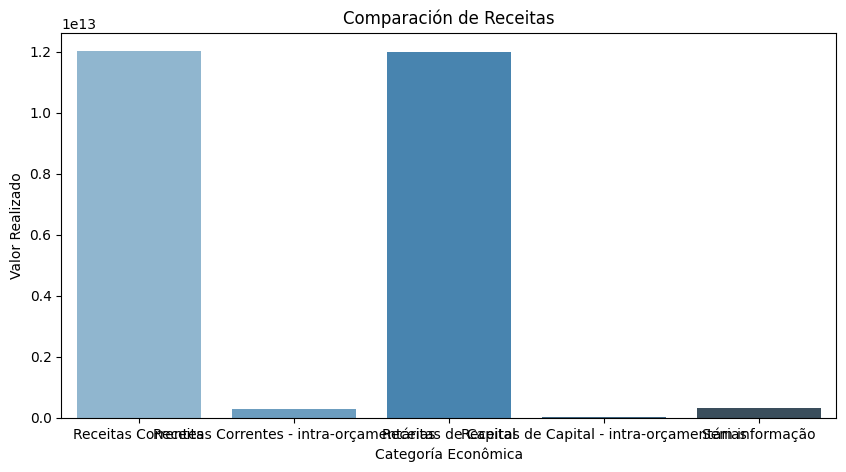

In [8]:
df_agrupado = df_consolidado.groupby('categoria_economica')['valor_realizado'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='categoria_economica', y='valor_realizado', data=df_agrupado, palette='Blues_d')

plt.title('Comparación de Receitas')
plt.ylabel('Valor Realizado')
plt.xlabel('Categoría Econômica')
